In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.utils import image_dataset_from_directory

In [3]:
train_data=image_dataset_from_directory(
    r"..\data\retina\train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 76515 files belonging to 4 classes.


In [4]:
valid_data=image_dataset_from_directory(
    r"..\data\retina\val",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 21861 files belonging to 4 classes.


In [5]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [6]:
INPUT_SHAPE=(224, 224, 3)

In [7]:
mobile_net=tf.keras.applications.MobileNetV3Large(
    input_shape=INPUT_SHAPE,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
)

In [8]:
model=tf.keras.models.Sequential()

In [9]:
model.add(tf.keras.Input(shape=INPUT_SHAPE))

In [10]:
model.add(mobile_net)

In [11]:
model.add(tf.keras.layers.Dense(units=4,activation="softmax"))

In [16]:
metrics_list=['accuracy']

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=metrics_list)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 1000)             5507432   
 l)                                                              
                                                                 
 dense (Dense)               (None, 4)                 4004      
                                                                 
Total params: 5,511,436
Trainable params: 5,487,036
Non-trainable params: 24,400
_________________________________________________________________


In [19]:
training_history=model.fit(x=train_data,validation_data=valid_data,epochs=10,verbose=1)

Epoch 1/10


2392/2392 [==============================] - 304s 124ms/step - loss: 0.8246 - accuracy: 0.7639 - val_loss: 1.5332 - val_accuracy: 0.5179
Epoch 2/10
2392/2392 [==============================] - 300s 125ms/step - loss: 0.7215 - accuracy: 0.7799 - val_loss: 0.6729 - val_accuracy: 0.8126
Epoch 3/10
2392/2392 [==============================] - 306s 128ms/step - loss: 0.5941 - accuracy: 0.8045 - val_loss: 0.6959 - val_accuracy: 0.8009
Epoch 4/10
2392/2392 [==============================] - 298s 124ms/step - loss: 0.5487 - accuracy: 0.8253 - val_loss: 0.5787 - val_accuracy: 0.8179
Epoch 5/10
2392/2392 [==============================] - 297s 124ms/step - loss: 0.5178 - accuracy: 0.8433 - val_loss: 0.5100 - val_accuracy: 0.8225
Epoch 6/10
2392/2392 [==============================] - 298s 124ms/step - loss: 0.4711 - accuracy: 0.8584 - val_loss: 0.4427 - val_accuracy: 0.8658
Epoch 7/10
2392/2392 [==============================] - 300s 125ms/step - loss: 0.5000 - accuracy: 0.8426 - val_loss: 1.123

In [20]:
model.save("./trained_retinal_model.h5")

In [21]:
training_history.history

{'loss': [0.8245616555213928,
  0.7215079069137573,
  0.5941248536109924,
  0.5486722588539124,
  0.5177826285362244,
  0.47114813327789307,
  0.5000362992286682,
  0.47929731011390686,
  0.4418254792690277,
  0.45460107922554016],
 'accuracy': [0.7639286518096924,
  0.7798863053321838,
  0.8045481443405151,
  0.8252760767936707,
  0.8433117866516113,
  0.8583937883377075,
  0.8425537347793579,
  0.8529961705207825,
  0.8648500442504883,
  0.8606939911842346],
 'val_loss': [1.5331658124923706,
  0.6729254722595215,
  0.6959207653999329,
  0.5786746144294739,
  0.5099796652793884,
  0.4426726996898651,
  1.1231086254119873,
  0.48656174540519714,
  0.4562264084815979,
  0.5375508069992065],
 'val_accuracy': [0.517862856388092,
  0.812588632106781,
  0.8008782863616943,
  0.8178948760032654,
  0.8224692344665527,
  0.86583411693573,
  0.7020722031593323,
  0.8480856418609619,
  0.8620374202728271,
  0.8495951890945435]}

In [23]:
import pickle

In [26]:
with open("training_history.pkl","wb") as f:
    pickle.dump(training_history.history,f)

In [27]:
with open("training_history.pkl","rb") as f:
    load_history=pickle.load(f)
print(load_history)

{'loss': [0.8245616555213928, 0.7215079069137573, 0.5941248536109924, 0.5486722588539124, 0.5177826285362244, 0.47114813327789307, 0.5000362992286682, 0.47929731011390686, 0.4418254792690277, 0.45460107922554016], 'accuracy': [0.7639286518096924, 0.7798863053321838, 0.8045481443405151, 0.8252760767936707, 0.8433117866516113, 0.8583937883377075, 0.8425537347793579, 0.8529961705207825, 0.8648500442504883, 0.8606939911842346], 'val_loss': [1.5331658124923706, 0.6729254722595215, 0.6959207653999329, 0.5786746144294739, 0.5099796652793884, 0.4426726996898651, 1.1231086254119873, 0.48656174540519714, 0.4562264084815979, 0.5375508069992065], 'val_accuracy': [0.517862856388092, 0.812588632106781, 0.8008782863616943, 0.8178948760032654, 0.8224692344665527, 0.86583411693573, 0.7020722031593323, 0.8480856418609619, 0.8620374202728271, 0.8495951890945435]}


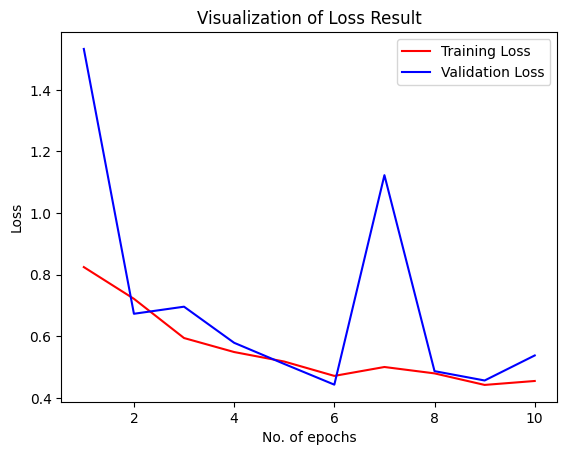

In [29]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,load_history['loss'],color='red',label="Training Loss")
plt.plot(epochs,load_history['val_loss'],color='blue',label="Validation Loss")
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss Result")
plt.legend()
plt.show()

In [30]:
model=tf.keras.models.load_model("trained_retinal_model.h5")

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 1000)             5507432   
 l)                                                              
                                                                 
 dense (Dense)               (None, 4)                 4004      
                                                                 
Total params: 5,511,436
Trainable params: 5,487,036
Non-trainable params: 24,400
_________________________________________________________________


In [40]:
test_data=image_dataset_from_directory(
    r"..\data\retina\test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 10933 files belonging to 4 classes.


In [41]:
test_loss,test_acc=model.evaluate(test_data)

342/342 [==============================] - 13s 36ms/step - loss: 0.5437 - accuracy: 0.8483


In [42]:
true_categories=tf.concat([y for x,y in test_data],axis=0)
true_categories

<tf.Tensor: shape=(10933, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)>

In [43]:
y_true=tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

In [44]:
predicted_categories=model.predict(test_data)
predicted_categories

342/342 [==============================] - 10s 30ms/step


array([[0.7830443 , 0.0631032 , 0.13721617, 0.01663626],
       [0.7830443 , 0.0631032 , 0.13721617, 0.01663626],
       [0.7830443 , 0.0631032 , 0.13721617, 0.01663626],
       ...,
       [0.00345745, 0.01570681, 0.02315779, 0.957678  ],
       [0.00345745, 0.01570681, 0.02315779, 0.957678  ],
       [0.00345745, 0.01570681, 0.02315779, 0.957678  ]], dtype=float32)

In [45]:
y_pred=tf.argmax(predicted_categories,axis=1)
y_pred

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86      3746
           1       0.78      0.72      0.75      1161
           2       0.00      0.00      0.00       887
           3       0.94      0.93      0.93      5139

    accuracy                           0.85     10933
   macro avg       0.62      0.66      0.64     10933
weighted avg       0.79      0.85      0.81     10933



In [54]:
from sklearn.metrics import confusion_matrix

In [56]:
cm=confusion_matrix(y_true,y_pred)
print(cm)

[[3655   70    1   20]
 [ 143  831    0  187]
 [ 759   12    0  116]
 [ 198  148    5 4788]]


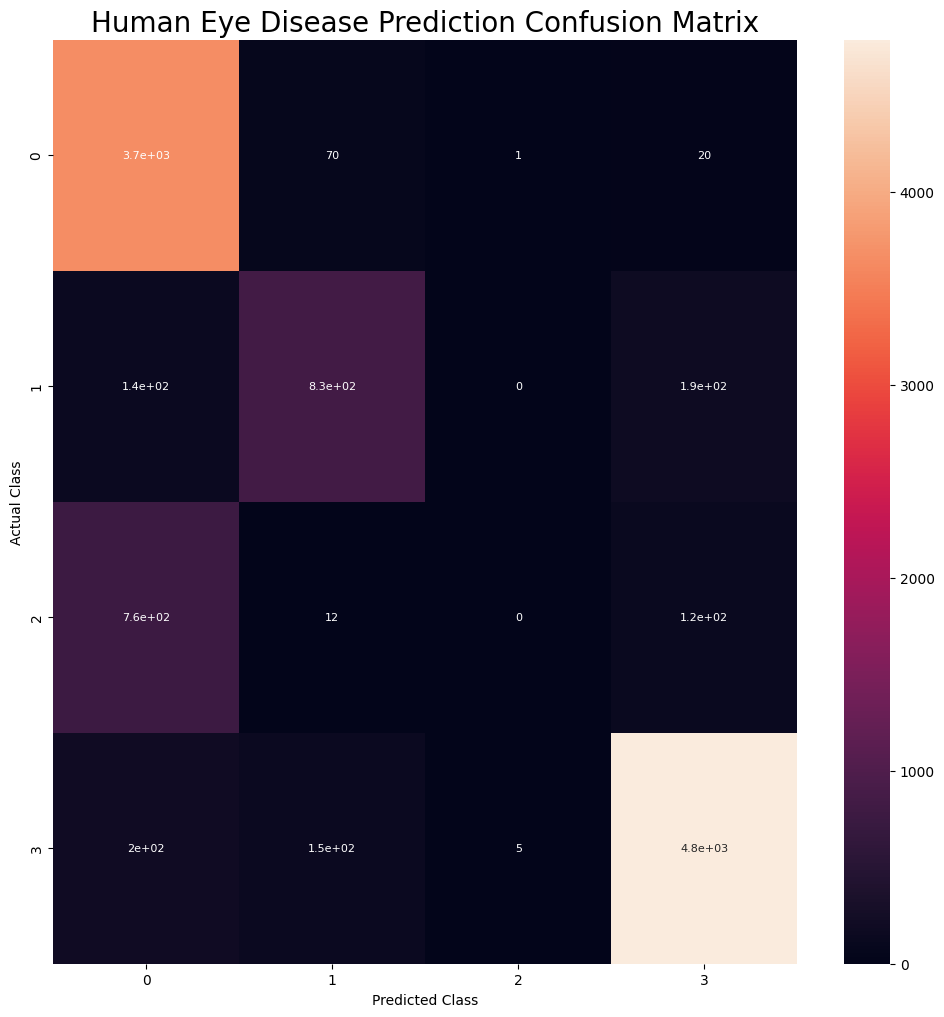

In [64]:
plt.figure(figsize=(12,12))
sns.heatmap(cm,annot=True,annot_kws={"size":8})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Human Eye Disease Prediction Confusion Matrix",fontsize=20)
plt.show()